# SEABORN

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## 1 - Visualisation des notes des étudiants

- Chargez le fichier `student_grades.csv` dans un DataFrame nommé `grades_df`.
- Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.

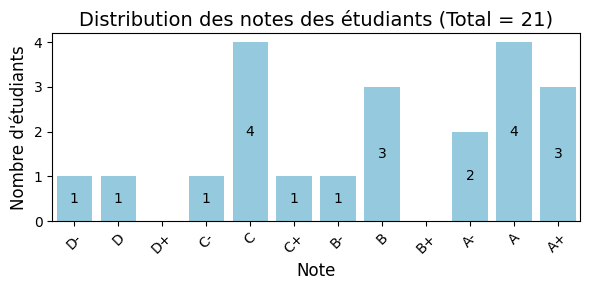

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier contenant les notes des étudiants
fichier_grades = './data/student_grades.csv'
grades_df = pd.read_csv(fichier_grades, names=['ID', 'salle', 'note'])

# Définir l'ordre des notes académiques
ordre_notes = ['D-', 'D', 'D+', 
               'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+']

# Créer le graphique de type countplot pour visualiser la distribution des notes
plt.figure(figsize=(6,3))
ax = sns.countplot(data=grades_df, x='note', order=ordre_notes, color='skyblue')

# Ajouter le nombre d'étudiants au centre de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, int(bar.get_height()), ha='center', va='center')

# Ajouter titre et labels
plt.title(f"Distribution des notes des étudiants (Total = {grades_df.shape[0]})", fontsize=14)
plt.xlabel("Note", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2 - Comparaison des notes en fonction des salles

- Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.

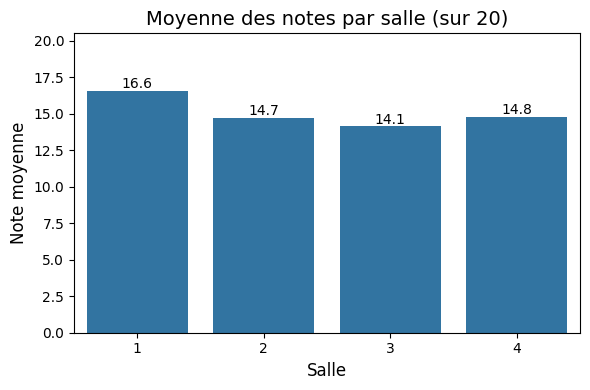

In [222]:
# Définir la correspondance des notes
conversion_notes = {
    'F-': 0, 'F': 1, 'F+': 2,
    'E-': 3, 'E': 4, 'E+': 5,
    'D-': 6, 'D': 7, 'D+': 8,
    'C-': 9, 'C': 10, 'C+': 11,
    'B-': 12, 'B': 13, 'B+': 14,
    'A-': 15, 'A': 16, 'A+': 17
}

# Créer la colonne note_dec avec les nombres correspondant
grades_df['note_dec'] = grades_df['note'].map(conversion_notes)

# Normaliser sur 20
grades_df['note_sur_20'] = grades_df['note_dec'] * 20 / 17
grades_df['note_sur_20'] = grades_df['note_sur_20'].apply(lambda x: round(x * 2) / 2)

# Calculer la moyenne des notes sur 20 par salle
moyennes_par_salle = grades_df.groupby('salle')['note_sur_20'].mean().reset_index()

# Créer le graphique à barres
plt.figure(figsize=(6,4))
ax = sns.barplot(data=moyennes_par_salle, x='salle', y='note_sur_20')

# Ajouter la valeur moyenne au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f"{bar.get_height():.1f}", ha='center')

# Ajouter titre et labels
plt.title("Moyenne des notes par salle (sur 20)", fontsize=14)
plt.xlabel("Salle", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)
plt.ylim(0, 20.5)  # Ajuster l'axe y pour inclure 20
plt.tight_layout()
plt.show()


## 3 - Comparaison des notes en fonction du statut de réussite

- Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.

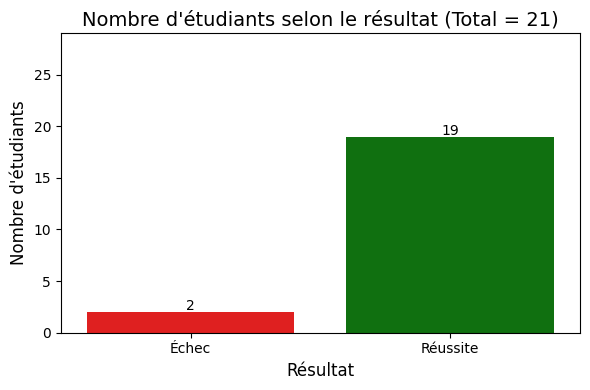

In [223]:
grades_df['result'] = grades_df['note_sur_20'].apply(lambda x: "Réussite" if x >= 10 else "Échec")

# Compter le nombre d'étudiants par résultat
result_counts = grades_df['result'].value_counts().reindex(['Échec', 'Réussite']).reset_index()
result_counts.columns = ['resultat', 'nombre']

# Créer le graphique à barres
plt.figure(figsize=(6,4))
ax = sns.barplot(data=result_counts, x='resultat', y='nombre', hue='resultat', palette=['red', 'green'])

# Ajouter le nombre au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, int(bar.get_height()), ha='center')

# Ajouter titre et labels
plt.title(f"Nombre d'étudiants selon le résultat (Total = {grades_df.shape[0]})", fontsize=14)
plt.xlabel("Résultat", fontsize=12)
plt.ylabel("Nombre d'étudiants", fontsize=12)
plt.ylim(0, result_counts['nombre'].max() + 10)
plt.tight_layout()
plt.show()

## 4 - Visualisation de la corrélation entre les variables

- Chargez le fichier `titanic.csv` dans un DataFrame nommé `titanic_df`.
- Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame `titanic_df`.

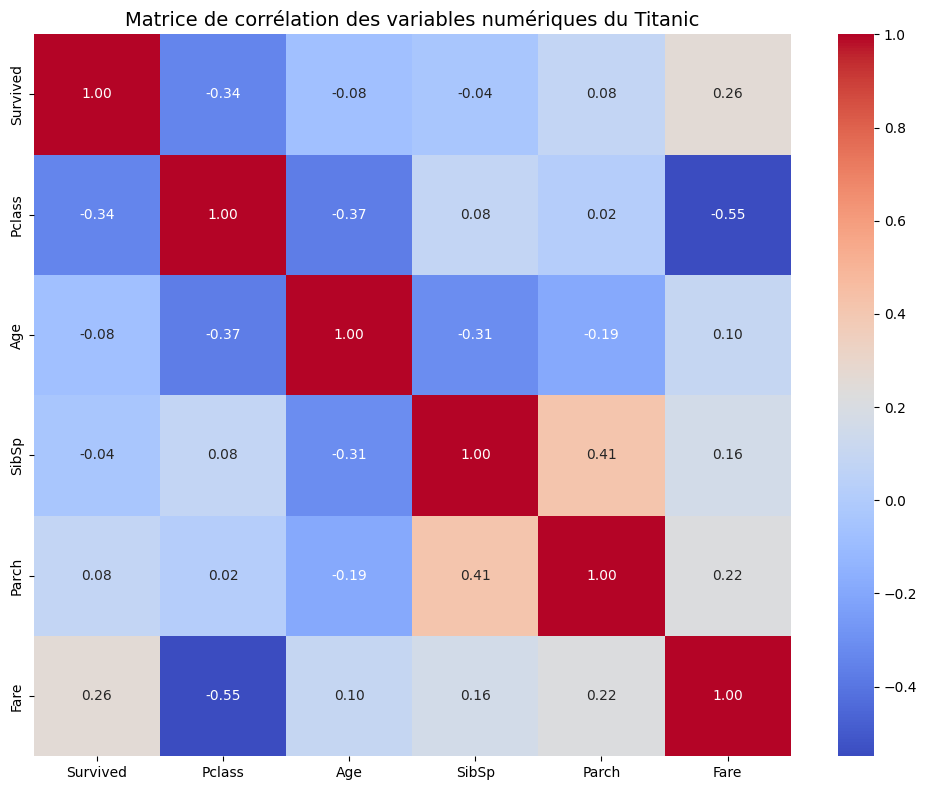

In [224]:
# Charger le fichier des passagers du titanic
fichier_titanic = './data/titanic.csv'
titanic_df = pd.read_csv(fichier_titanic)

# Sélectionner uniquement les colonnes numériques pertinentes
titanic_df_numeric = titanic_df[['Survived','Pclass','Age','SibSp','Parch','Fare']]

# Calculer la matrice de corrélation
corr_matrix = titanic_df_numeric.corr()

# Créer la heatmap de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables numériques du Titanic", fontsize=14)
plt.tight_layout()
plt.show()

## 5 - Comparaison des tarifs en fonction du statut de survie

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte (boxplot) montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survit ou non).

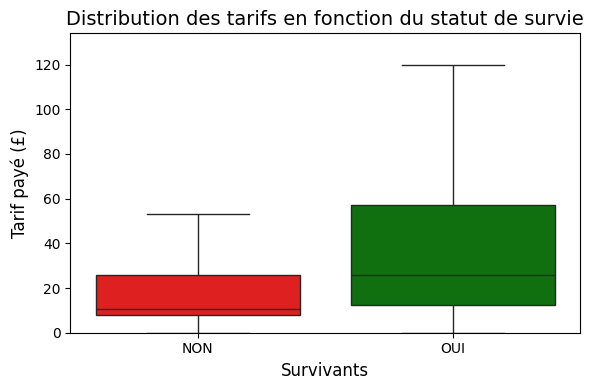

In [225]:
# Ajouter une colonne avec des labels textuels
titanic_df['Survived_label'] = titanic_df['Survived'].map({0: "NON", 1: "OUI"})

# Créer le graphique boxplot des tarifs selon le statut de survie
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=titanic_df, x='Survived_label', y='Fare', hue='Survived_label', palette={"NON":'red', "OUI":'green'}, showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des tarifs en fonction du statut de survie", fontsize=14)
plt.xlabel("Survivants", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)
plt.ylim(0, titanic_df['Fare'].quantile(0.96))  # Limite pour exclure les valeurs extrêmes extrêmes
plt.tight_layout()
plt.show()


## 6 - Visualisation des âges des passagers

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la distribution des âges des passagers.

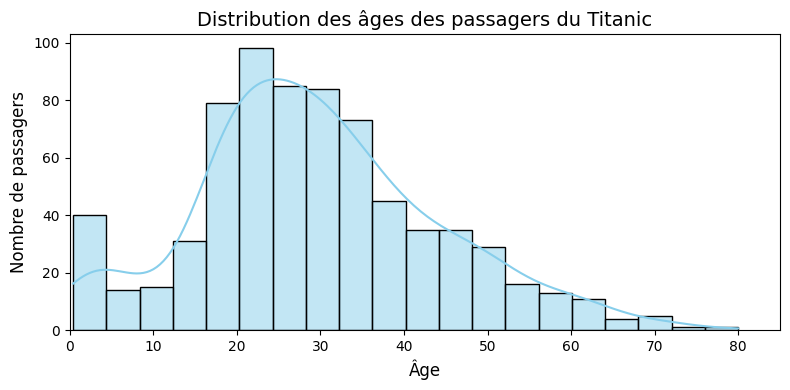

In [226]:
# Créer l'histogramme des âges
plt.figure(figsize=(8,4))
ax = sns.histplot(data=titanic_df, x='Age', bins=20, kde=True, color='skyblue')

# Ajouter titre et labels
plt.title("Distribution des âges des passagers du Titanic", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.xlim(0, titanic_df['Age'].max() + 5)  # Ajuster l'axe x pour inclure tous les âges
plt.tight_layout()
plt.show()

## 7 - Comparaison des âges en fonction du statut de survie

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction de leur statut de survie.

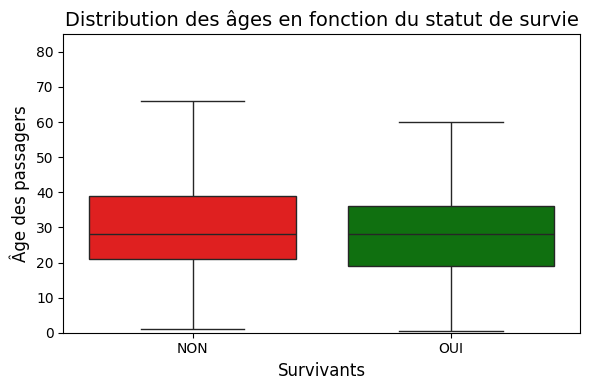

In [227]:
# Créer le boxplot des âges selon le statut de survie
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=titanic_df, x='Survived_label', y='Age', hue='Survived_label', 
                 palette={"NON": 'red', "OUI": 'green'}, showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des âges en fonction du statut de survie", fontsize=14)
plt.xlabel("Survivants", fontsize=12)
plt.ylabel("Âge des passagers", fontsize=12)
plt.ylim(0, titanic_df['Age'].max() + 5)  # Ajuster l'axe y pour inclure tous les âges
plt.tight_layout()
plt.show()

## 8 - Visualisation de la répartition des tarifs

- Utilisez le DataFrame `titanic_df` pour créer un histogramme représentant la répartition des tarifs payés par les passagers.

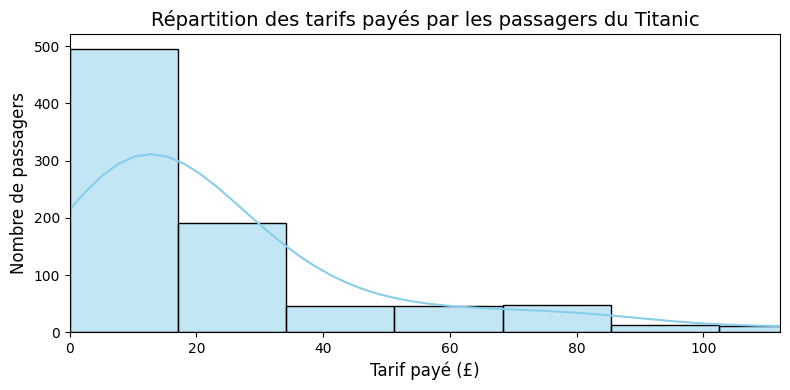

In [228]:
# Créer l'histogramme des tarifs
plt.figure(figsize=(8,4))
ax = sns.histplot(data=titanic_df, x='Fare', bins=30, kde=True, color='skyblue')

# Ajouter titre et labels
plt.title("Répartition des tarifs payés par les passagers du Titanic", fontsize=14)
plt.xlabel("Tarif payé (£)", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)

# Limiter l'axe x pour exclure les valeurs extrêmes (optionnel)
plt.xlim(0, titanic_df['Fare'].quantile(0.95))

plt.tight_layout()
plt.show()


## 9 - Comparaison des tarifs en fonction de la classe

- Utilisez le DataFrame `titanic_df` pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe (1ère, 2ème ou 3ème classe).

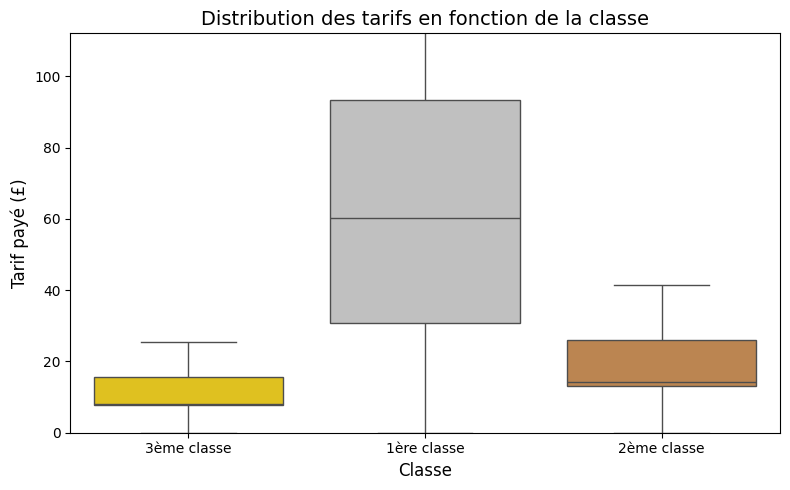

In [229]:
# Créer une colonne avec des labels textuels pour les classes
titanic_df['Pclass_label'] = titanic_df['Pclass'].map({1: "1ère classe", 2: "2ème classe", 3: "3ème classe"})

# Créer le boxplot des tarifs selon la classe
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=titanic_df, x='Pclass_label', y='Fare', hue='Pclass_label', palette=["gold", "silver", "peru"], showfliers=False)

# Ajouter titre et labels
plt.title("Distribution des tarifs en fonction de la classe", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Tarif payé (£)", fontsize=12)

# Limiter l'axe y pour exclure les valeurs extrêmes
plt.ylim(0, titanic_df['Fare'].quantile(0.95))

plt.tight_layout()
plt.show()


## 10 - Visualisation de la répartition du genre des passagers

- Utilisation du DataFrame `titanic_df` pour créer un histogramme représentant la répartition des genres.

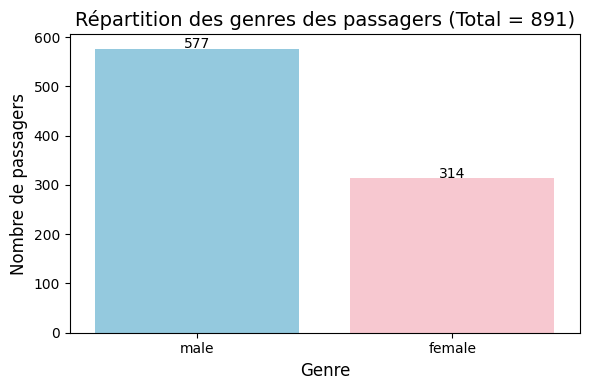

In [238]:
# Créer un histogramme pour la répartition du genre
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_df, x='Sex', hue='Sex', palette=['skyblue', 'pink'])

# Ajouter le nombre de passagers au-dessus de chaque barre
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, int(bar.get_height()), ha='center')

# Ajouter titre et labels
plt.title(f"Répartition des genres des passagers (Total = {titanic_df.shape[0]})", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de passagers", fontsize=12)
plt.tight_layout()
plt.show()
